In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [108]:
#importing data from github file and converting into a DataFrame 
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [109]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [110]:
#lets drop the loan id column as deleting it will not affect the dataset much.
data.drop('Loan_ID',axis=1,inplace=True)

In [111]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis(EDA)

In [112]:
#finding number of rows and columns
data.shape

(614, 12)

the dataset has 614 rows and 13 columns in which 8 columns has catagorical data


In [113]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations from the above dataset after finding out the statistics of the data:-

1.The difference between mean and standard deviation is appears to be good in Loan_Amount_Term and Credit_History. In LoanAmount column there is not much difference between the mean and standard deviation. And in ApplicantIncome and CoapplicantIncome the standard deviation is more than the mean which may be because of high variation between values and abnormal distribution of data.

2.The difference between all the quantiles does not appears to be good for any column.

3.The minimum value of CoapplicantIncome and Credit_history is 0. and also the value is zero in 25% for CoapplicantIncome.

4.The difference between the minimum value and the 1st quantile for ApplicantIncome,LoanAmount and Loan_Amount_Term is very large. there might be some outliers present in this region.


In [114]:
#finding the null values in each column
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

some null values are present in columns such as Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History. lets dig more into the dataset before filling these NANs.

In [115]:
#no. of columns in the dataset
data.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [116]:
#checking different datatypes present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


The dataset has 7 columns having object datatype values, 1 column having int values and 4 columns having float values.

In [117]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Imputing columns having null values and encoding columns having object datatype values


In [118]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [119]:
#imputing Gender feature
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [120]:
#encoding the Gender column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [121]:
df2=lab_enc.fit_transform(data['Gender'])
pd.Series(df2)

data['Gender']=df2
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


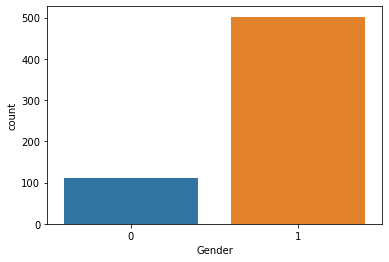

In [122]:
#lets plot the value counts for Gender
sns.countplot(x='Gender', data=data, )
plt.show()

More number of males has applied for loan as compared to females.

In [123]:
#imputing and encoding married column
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [124]:
#imputing Married feature
data['Married'].fillna(data['Married'].mode()[0], inplace=True)

In [125]:
df2=lab_enc.fit_transform(data['Married'])
pd.Series(df2)

data['Married']=df2
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


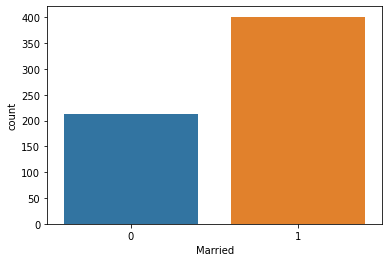

In [126]:
#lets plot the value counts for Married
sns.countplot(x='Married', data=data, )
plt.show()

More married people have applied for loan then unmarried people

In [127]:
#imputing and encoding Dependents column
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [128]:
#imputing the data
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

In [129]:
#encoding the data
df2=lab_enc.fit_transform(data['Dependents'])
pd.Series(df2)

data['Dependents']=df2
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


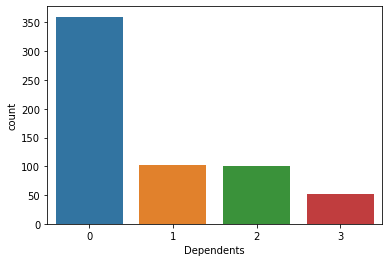

In [130]:
#lets plot the value counts for Dependents
sns.countplot(x='Dependents', data=data, )
plt.show()

people having zero dependents have applied more for loans

In [131]:
#imputing and encoding Education column
data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [132]:
#encoding the data
df2=lab_enc.fit_transform(data['Education'])
pd.Series(df2)

data['Education']=df2
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y


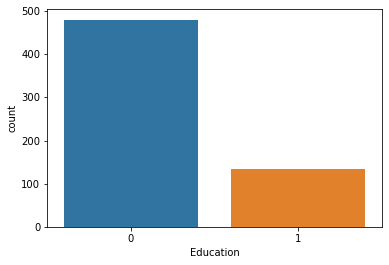

In [133]:
#lets plot the value counts for Dependents
sns.countplot(x='Education', data=data, )
plt.show()

In [134]:
#imputing and encoding Self_Employed column
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [135]:
#imputing Self_Employed feature
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)


In [136]:
#encoding the data
df2=lab_enc.fit_transform(data['Self_Employed'])
pd.Series(df2)

data['Self_Employed']=df2
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,Y


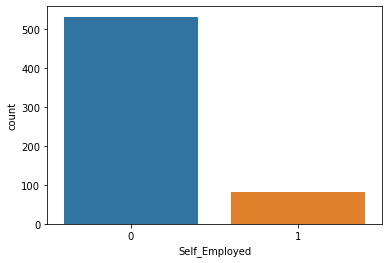

In [137]:
#lets plot the value counts for Gender
sns.countplot(x='Self_Employed', data=data, )
plt.show()

In [138]:
#imputing LoanAmount column
data.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [139]:
#imputing LoanAmount feature
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace=True)


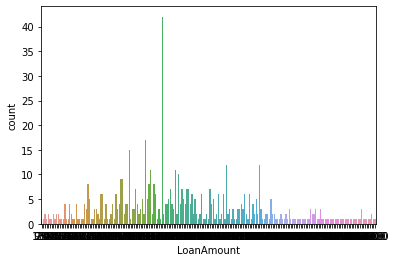

In [140]:
#lets plot the value counts for LoanAmount
sns.countplot(x='LoanAmount', data=data, )
plt.show()

In [141]:
#imputing and encoding Loan_Amount_Term column
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [142]:
#imputing Loan_Amount_Term feature
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

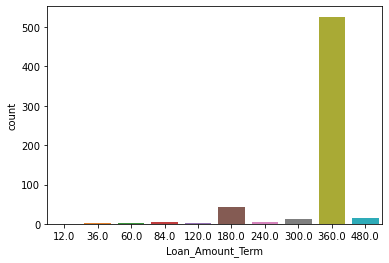

In [143]:
#lets plot the value counts for Loan_Amount_Term
sns.countplot(x='Loan_Amount_Term', data=data, )
plt.show()

In [144]:
#imputing and encoding Credit_History column
data.Credit_History.value_counts()



1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [145]:
#imputing Credit_History feature
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)



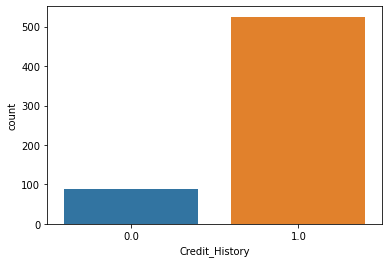

In [146]:

#lets plot the value counts for Credit_History
sns.countplot(x='Credit_History', data=data, )
plt.show()

In [147]:
# encoding Property_Area column
data.Property_Area.value_counts()



Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [148]:
#encoding the data
df2=lab_enc.fit_transform(data['Property_Area'])
pd.Series(df2)

data['Property_Area']=df2
data


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,Y


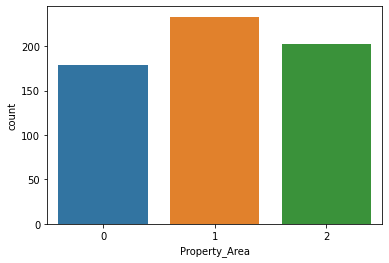

In [149]:

#lets plot the value counts for Property_Area
sns.countplot(x='Property_Area', data=data, )
plt.show()

In [150]:
#imputing and encoding Loan_Status column
data.Loan_Status.value_counts()



Y    422
N    192
Name: Loan_Status, dtype: int64

In [151]:
#encoding the data
df2=lab_enc.fit_transform(data['Loan_Status'])
pd.Series(df2)

data['Loan_Status']=df2
data



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


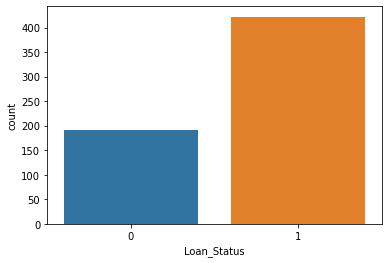

In [152]:
#lets plot the value counts for Loan_Status
sns.countplot(x='Loan_Status', data=data, )
plt.show()

Lets see whether the null values are filled 

In [153]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Lets see whether all columns have numbers data

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


Now as all Nans are filled and all the columns having object datatypes are converted into numbers, so now we can visualize the data.

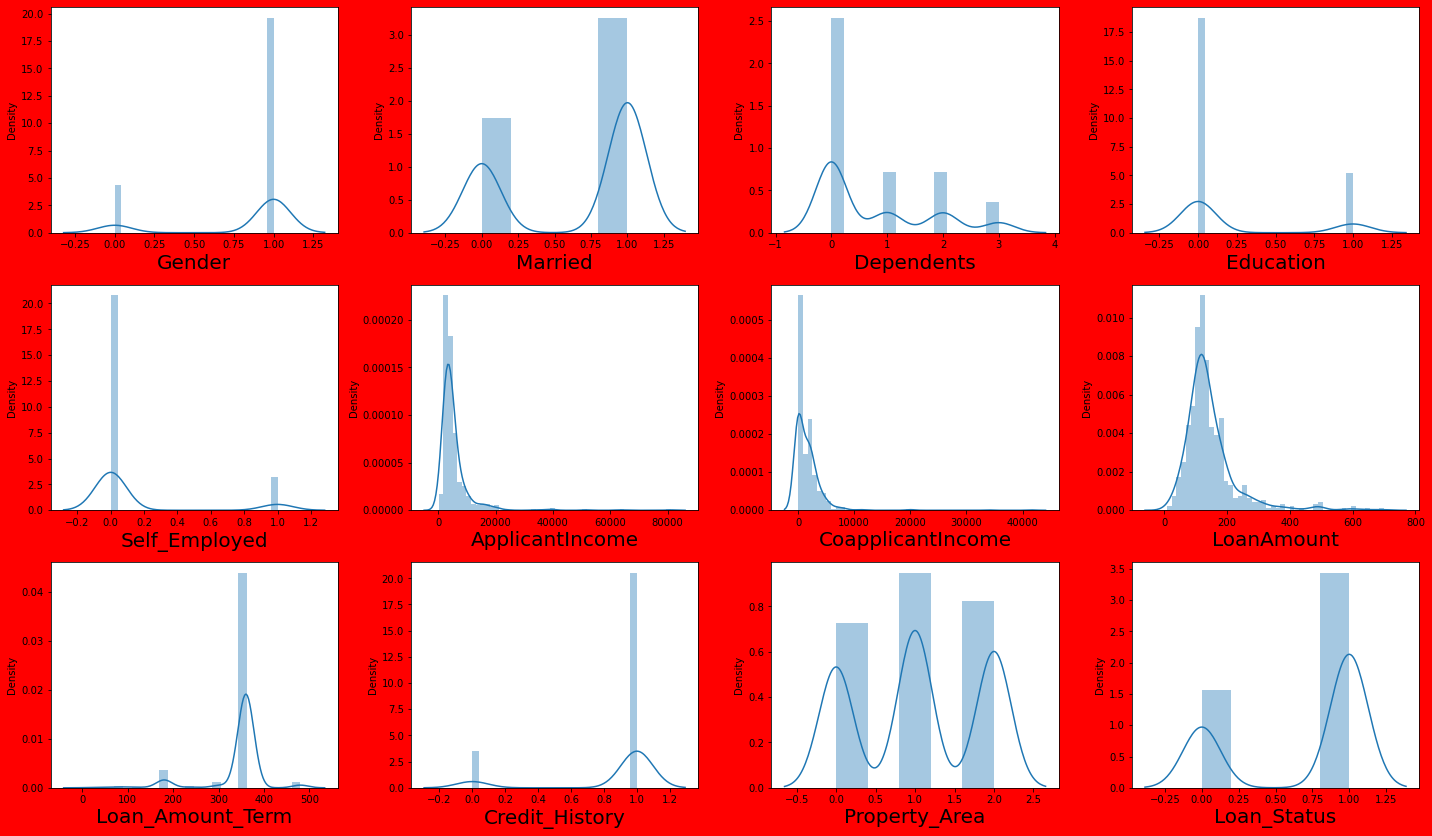

In [155]:
# now the data looks good and there is no missing values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

observations from the distplot
1.The data distribution does not look decent enough for most of the features i.e. it does not show normal distribution for most of the continious features(the curve is not bell shaped).

2.ApplicantIncome,CoapplicantIncome and LoanAmount has some skewness in right side.

3.We do not need to consider features like Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area and Loan_Status as they have catagorical data.

4.now lets check whether they have outliers in the distribution by plotting box plots.

In [157]:
#checking for outliers in all the features
df_features=data.drop('Loan_Status', axis=1)

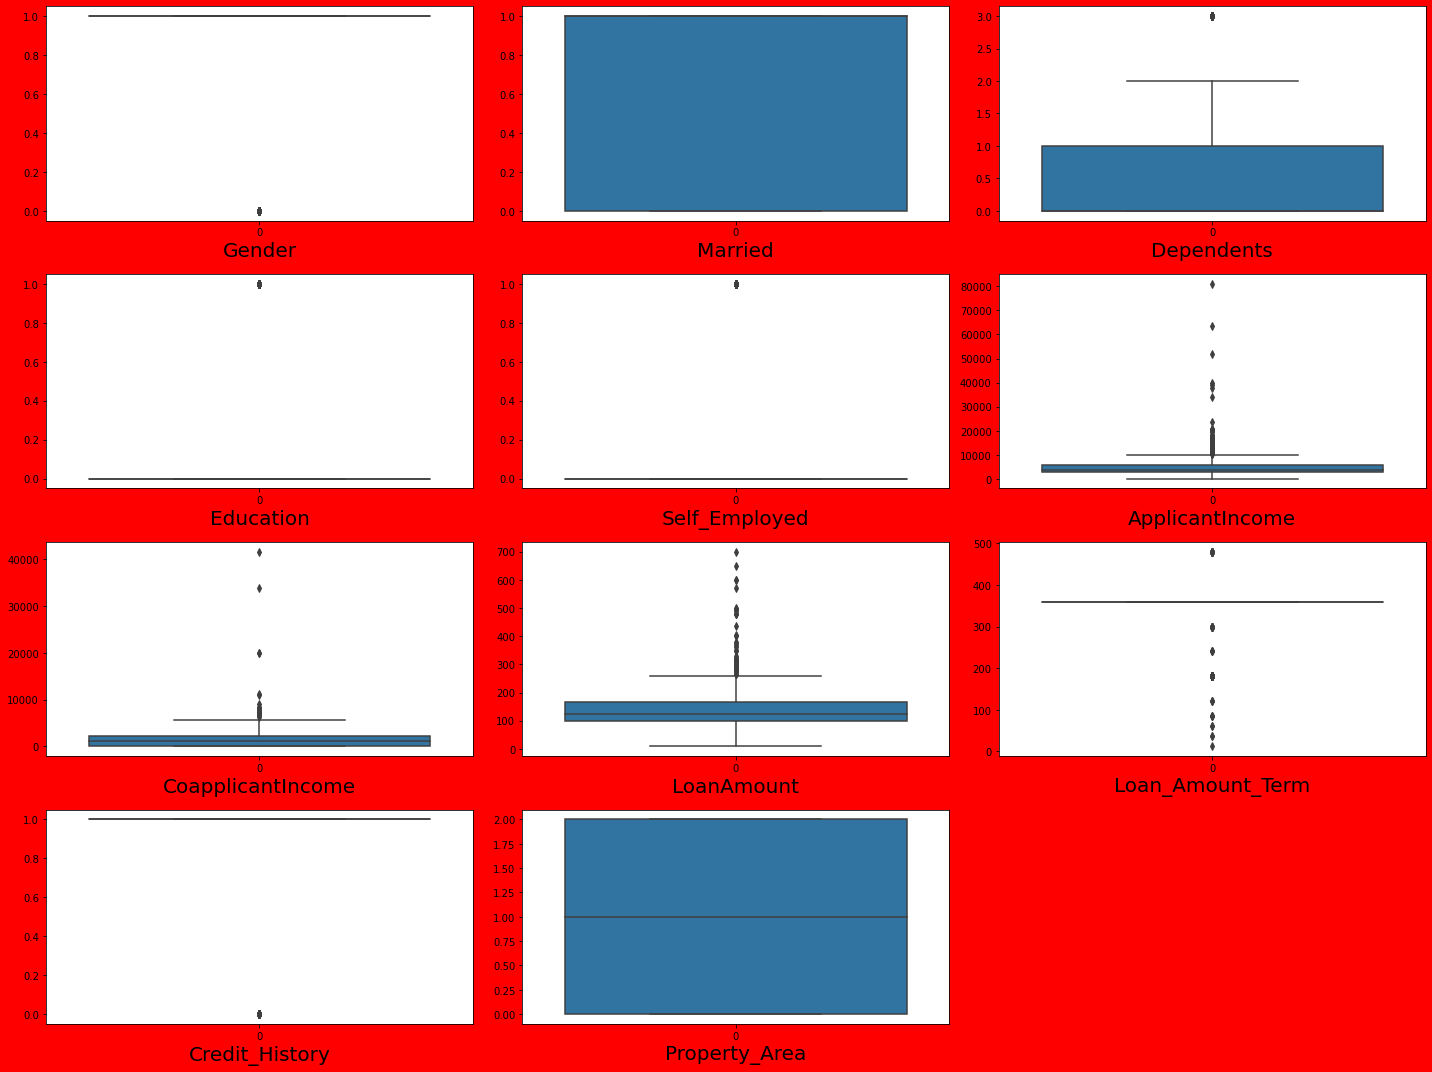

In [158]:
# checking for the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=11:
        plt.subplot(4,3,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

observations from the box plot.

1.Gender has outliers between 0 to 0.2

2.Married has no outliers.

3.Dependents has outliers between 2.5 and 3.

4.Education has outliers between 0.8 and 1.

5.Applicant_income has outliers between 10000 and 80000.

6.Self_employed has outliers betweeen 0.8 to 1.	

7.CoapplicantIncome has outliers between 7000 and 40000.	

8.Loan_amount has outliers between 300 to 700.

9.Loan_amount_term has outliers between o to 300 and 400 to 500.

10.Credit history  has also a lot of outliers betweeen 0 to 0.2. 

11.Property area has no outliers


For columns having catagorical data we will not remove the outliers as they need to be present during model building.
and for rest columns having continious data lets see if we can remove the outliers.

In [162]:
#assigning our datset to a new variable for testing the feasibility after removing the outliers
df=data

In [163]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

Gender                  0.00
Married                 1.00
Dependents              1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64

In [164]:
df.shape


(614, 12)

In [165]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [166]:
#removing the outliers for ApplicantIncome
ai_high=q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome)


index=np.where(df['ApplicantIncome'] > ai_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(564, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
560,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
561,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
562,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [167]:
#removing the outliers for CoapplicantIncome
cai_high=q3.CoapplicantIncome + (1.5 * iqr.CoapplicantIncome)


index=np.where(df['CoapplicantIncome'] > cai_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(548, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
544,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
545,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
546,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [168]:
#removing the outliers for LoanAmount
la_high=q3.LoanAmount + (1.5 * iqr.LoanAmount)


index=np.where(df['LoanAmount'] > la_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(535, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
531,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
532,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
533,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [169]:
data=df

In [170]:
data.shape


(535, 12)

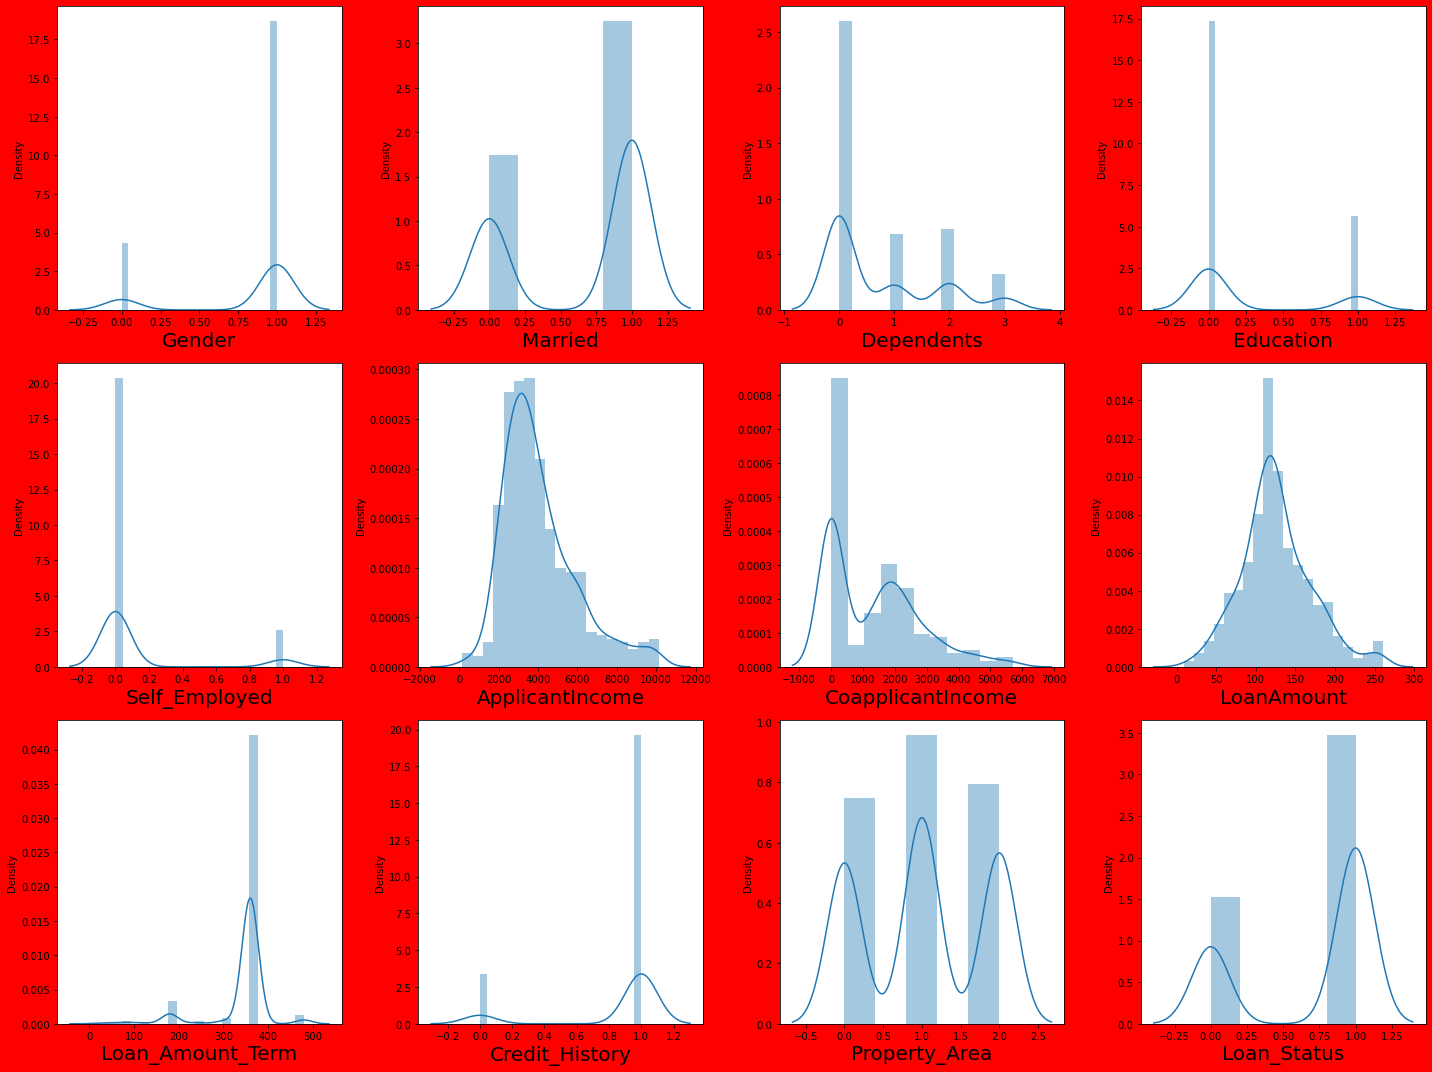

In [171]:
#now lets check if the outliers are removed
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

now the distribution is looking somewhat better as compared to before when outliers were not removed.

In [172]:
#Lets plot some more graphs to have a better understanding of the data 
#correlation between the features and labels

y=data['Loan_Status']
x=data.drop(columns=['Loan_Status'])

In [173]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [174]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 535, dtype: int32

In [175]:
#finding the corelation between the features in the data set
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.372519,0.187076,0.072320,0.021148,0.074849,0.198652,0.146637,-0.079050,0.005714,-0.006906,0.047217
Married,0.372519,1.000000,0.340098,0.025423,0.016299,0.006116,0.258669,0.203712,-0.087666,0.008181,0.012458,0.085391
Dependents,0.187076,0.340098,1.000000,0.082991,0.054542,0.118185,-0.064006,0.112639,-0.092739,-0.032058,0.016343,0.008150
Education,0.072320,0.025423,0.082991,1.000000,0.000869,-0.147857,-0.028559,-0.123725,-0.073561,-0.085002,-0.063382,-0.114159
Self_Employed,0.021148,0.016299,0.054542,0.000869,1.000000,0.187889,-0.056586,0.085438,-0.064348,0.031554,-0.060971,-0.005302
ApplicantIncome,0.074849,0.006116,0.118185,-0.147857,0.187889,1.000000,-0.266763,0.475321,-0.062157,0.051843,-0.076389,0.013046
CoapplicantIncome,0.198652,0.258669,-0.064006,-0.028559,-0.056586,-0.266763,1.000000,0.291070,-0.008596,0.008528,-0.092128,0.068056
LoanAmount,0.146637,0.203712,0.112639,-0.123725,0.085438,0.475321,0.291070,1.000000,0.089996,0.011507,-0.122253,-0.011111
Loan_Amount_Term,-0.079050,-0.087666,-0.092739,-0.073561,-0.064348,-0.062157,-0.008596,0.089996,1.000000,-0.017483,-0.081467,-0.025424
Credit_History,0.005714,0.008181,-0.032058,-0.085002,0.031554,0.051843,0.008528,0.011507,-0.017483,1.000000,0.009835,0.566580


In [176]:
#sorting the correlation values of Loan_Status with all the columns
data.corr()['Loan_Status'].sort_values()

Education           -0.114159
Loan_Amount_Term    -0.025424
LoanAmount          -0.011111
Self_Employed       -0.005302
Dependents           0.008150
ApplicantIncome      0.013046
Property_Area        0.026103
Gender               0.047217
CoapplicantIncome    0.068056
Married              0.085391
Credit_History       0.566580
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

Credit History is highly corelated with the label(Loan_status).
To get a more clear view lets plot the heat map. we can get all the correlation there

<AxesSubplot:>

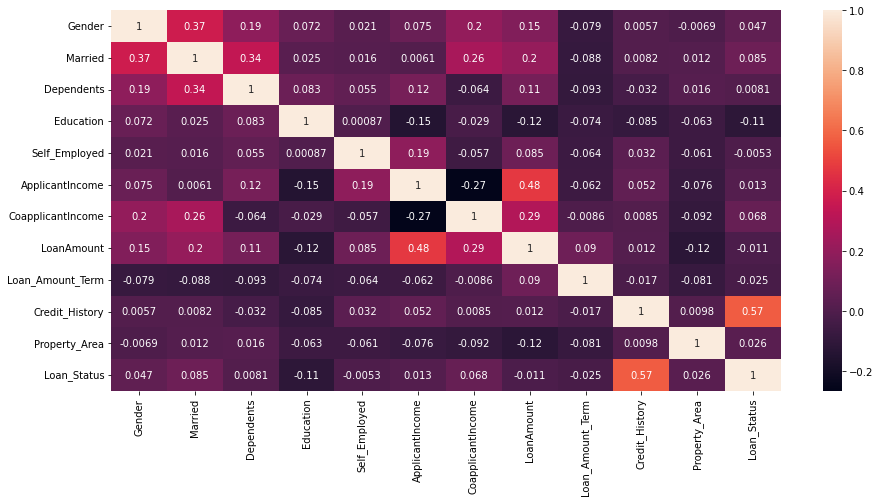

In [177]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

It seems like the most of features have not very much correlation with the label(Loan_status) except credit_history. also we can observe that some features have correlation among them. We will find more about it after finding outt he VIF scores for each feature. 

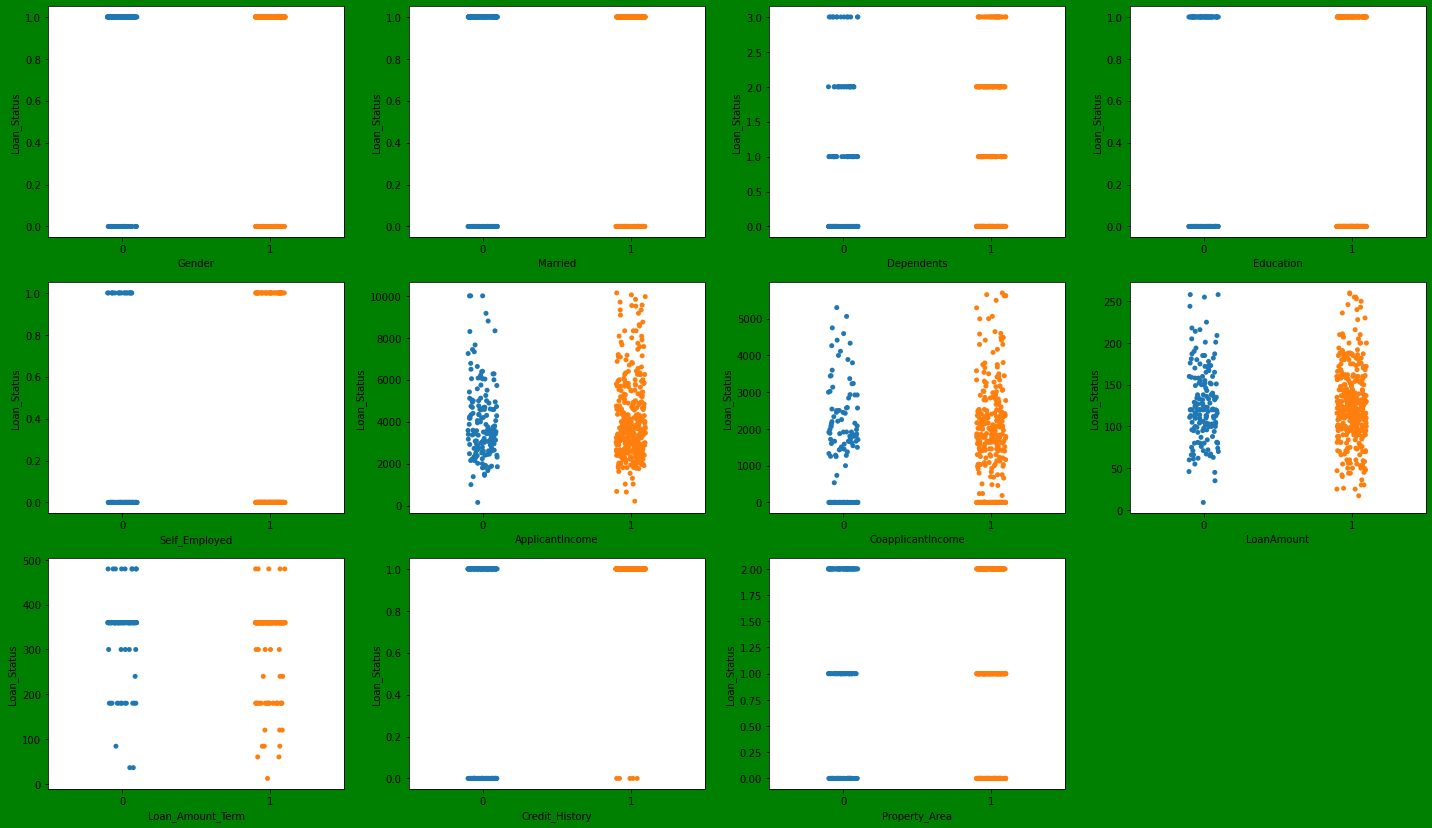

In [178]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Loan_Status',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

The trend is not clear here, so lets plot the regplot for a better view of the trend in relationship between the features and the label.

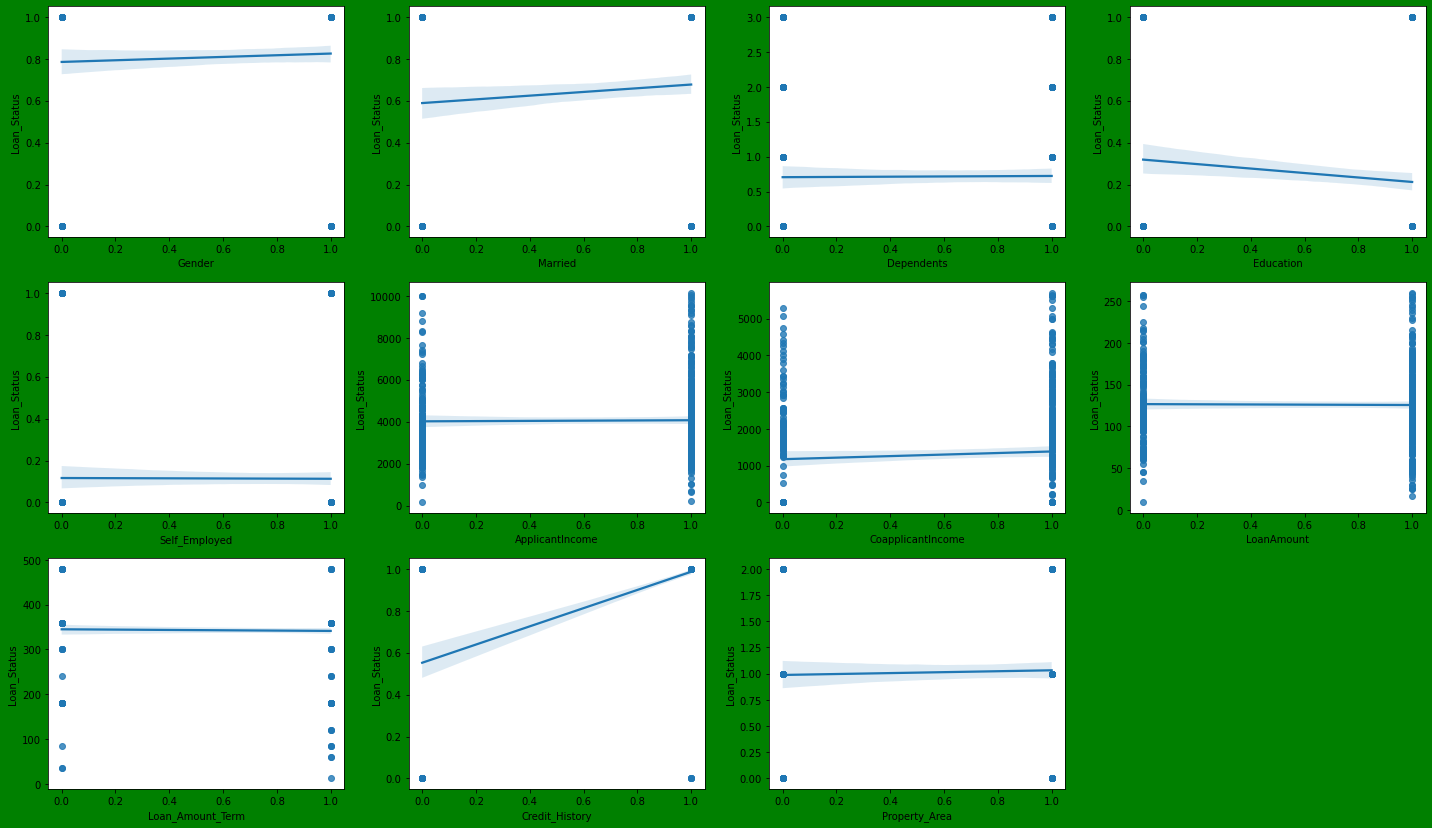

In [179]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Loan_Status',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

observations from the regplot

1.Credit_history, Married and Gender are positively co-related with label(Loan_Status) as the trend is in upward direction.

2.Education is negatively co-related with the the label(Loan_Status ) as trend is  downward.

3.Rest all the features are weakly correlated with the label(Loan_Status) as the trend is neither completely upward nor completely downward.


In [180]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [181]:
x_scaled.shape[1]

11

Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity


In [182]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

,VIF,Features
0,1.211423,Gender
1,1.374009,Married
2,1.198477,Dependents
3,1.068984,Education
4,1.044589,Self_Employed
5,1.820242,ApplicantIncome
6,1.575159,CoapplicantIncome
7,1.802837,LoanAmount
8,1.069388,Loan_Amount_Term
9,1.012430,Credit_History


Observations after finding the  variance inflation factor 

all the features have a VIF score between 1 and 5 so they are moderately multi colinear. No feature is highly multicolinear with another feature in the dataset.



Now as the label is not a continuous data but a catagorical data so this is a classification problem. We will be building some classification algorithms for this problem and we will find out the best machine learning model among them.

# Building classification models for predicting the Income and selecting the best model among them

In [183]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


338    0
488    1
451    1
410    0
449    0
Name: Loan_Status, dtype: int32

In [185]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [188]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier() 
rfc=RandomForestClassifier()   
svm=SVC()                 

In [189]:
models = [lr, knn, dtc, svm, rfc]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print (accuracy_score(y_test, y_pred))
    print (confusion_matrix(y_test, y_pred))
    print (classification_report(y_test, y_pred))

LogisticRegression()
0.835820895522388
[[ 12  20]
 [  2 100]]
              precision    recall  f1-score   support

           0       0.86      0.38      0.52        32
           1       0.83      0.98      0.90       102

    accuracy                           0.84       134
   macro avg       0.85      0.68      0.71       134
weighted avg       0.84      0.84      0.81       134

KNeighborsClassifier()
0.8208955223880597
[[13 19]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.72      0.41      0.52        32
           1       0.84      0.95      0.89       102

    accuracy                           0.82       134
   macro avg       0.78      0.68      0.70       134
weighted avg       0.81      0.82      0.80       134

DecisionTreeClassifier()
0.6940298507462687
[[15 17]
 [24 78]]
              precision    recall  f1-score   support

           0       0.38      0.47      0.42        32
           1       0.82      0.76      0.79       1

Here we can see that RandaomForestClassifier(), svc() and LogisticRegression() gives the best accuracy score. we have also checked the f1 score and we found out that RandaomForestClassifier() has thee best f1 score among all the models. now lets plot the ROC AUC curve to know about the best fitted model.

In [190]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dtc.predict(x_test)))
print(roc_auc_score(y_test,rfc.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))

0.6776960784313726
0.6786151960784313
0.6167279411764706
0.7205882352941176
0.6884191176470589


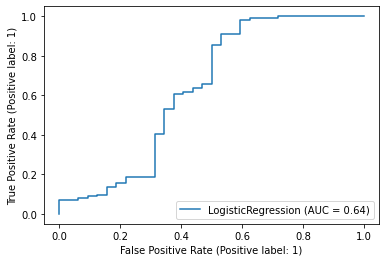

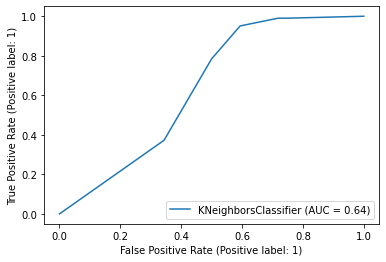

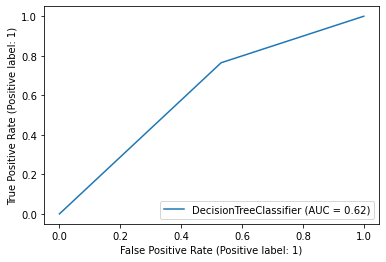

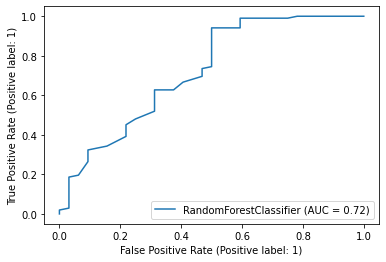

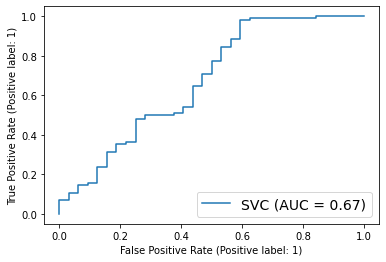

In [191]:
#plotting RocAuc curve
plot_roc_curve(lr,x_test,y_test)  
plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(svm,x_test,y_test)
plt.legend(prop = {'size':14}, loc ='lower right')

Random forest classifier gives the best Auc score.

# Cross validation scores for all models

In [195]:

for m in models:
    c_v= cross_val_score(m, x_scaled, y, cv = 10)
    print ('Cross Validation Score for ',m, ' is :', c_v.mean())
    print (' ')


Cross Validation Score for  LogisticRegression()  is : 0.820754716981132
 
Cross Validation Score for  KNeighborsClassifier()  is : 0.7925925925925925
 
Cross Validation Score for  DecisionTreeClassifier()  is : 0.7234800838574424
 
Cross Validation Score for  SVC()  is : 0.820754716981132
 
Cross Validation Score for  RandomForestClassifier()  is : 0.8002445842068484
 


We have concluded that the RandomForestClassifier() is the best model based on the accuracy  and Auc value scores of all the models. So now lets use RandomForestClassifier() for further evaluation and lets check whether we can improve the accuracy of the model by using Hyperparameter tuning using GridSearchCV.

# Hyperparameter Tuning

In [200]:
#performing hyperparameter tuning for Random Forest Classifier method
from sklearn.model_selection import GridSearchCV
param_grid={'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4,6],'n_estimators':[20,40,60,80,100,150],'criterion' :['gini', 'entropy']}

In [201]:
gridsearch=GridSearchCV(estimator= rfc , param_grid=param_grid )

In [202]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [20, 40, 60, 80, 100, 150]})

In [203]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 60}

In [204]:
rfc=RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,n_estimators=60,criterion='gini')

In [205]:
rfc.fit(x_train,y_train)


RandomForestClassifier(max_features='sqrt', min_samples_leaf=2, n_estimators=60)

In [206]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


In [207]:
#prediction of Loan_status 
print('loan status  is ', rfc.predict(scalar.transform([[0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0]])))

loan status  is  [1]


In [208]:
y_pred=rfc.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [209]:
#printing the confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[13, 19],
       [ 5, 97]], dtype=int64)

In [210]:
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52        32
           1       0.84      0.95      0.89       102

    accuracy                           0.82       134
   macro avg       0.78      0.68      0.70       134
weighted avg       0.81      0.82      0.80       134



The accuracy has not increased after using hyperparameter tuning.

In [211]:
#plotting Auc roc curve
print(roc_auc_score(y_test,rfc.predict(x_test)))

0.6786151960784313


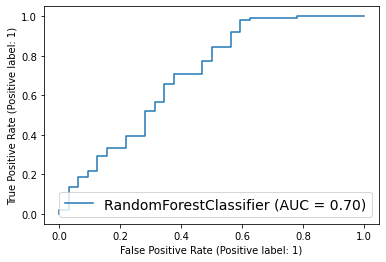

In [212]:
plot_roc_curve(rfc,x_test,y_test)
plt.legend(prop = {'size':14}, loc ='lower right')

In [213]:
#cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,x_scaled,y,cv=10)

array([0.81481481, 0.81481481, 0.77777778, 0.75925926, 0.7962963 ,
       0.79245283, 0.88679245, 0.83018868, 0.81132075, 0.8490566 ])

In [214]:
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=10).mean()

0.8020614954577219

# Saving the model

In [216]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle5'
pickle.dump(rfc,open('finalized_model.pickle5','wb'))